# Bước 1: Import thư viện

In [1]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

# Bước 2: Đọc dữ liệu

In [2]:
# đọc dữ liệu từ file csv
df = pd.read_csv('E:\DL\VNM.csv', encoding='utf-8')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet
df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
1     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
2     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
3     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
4     17/07/2023  72,300.0  73,000.0  73,600.0  72,200.0
...          ...       ...       ...       ...       ...
2500  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2501  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2502  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2503  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2504  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2505 rows x 5 columns]


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_13464\1141448510.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('E:\DL\VNM.csv', encoding='utf-8')


# Bước 3: Mô tả dữ liệu

In [3]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [4]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [5]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"


In [6]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [7]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


# Bước 4: Tiền xử lý dữ liệu

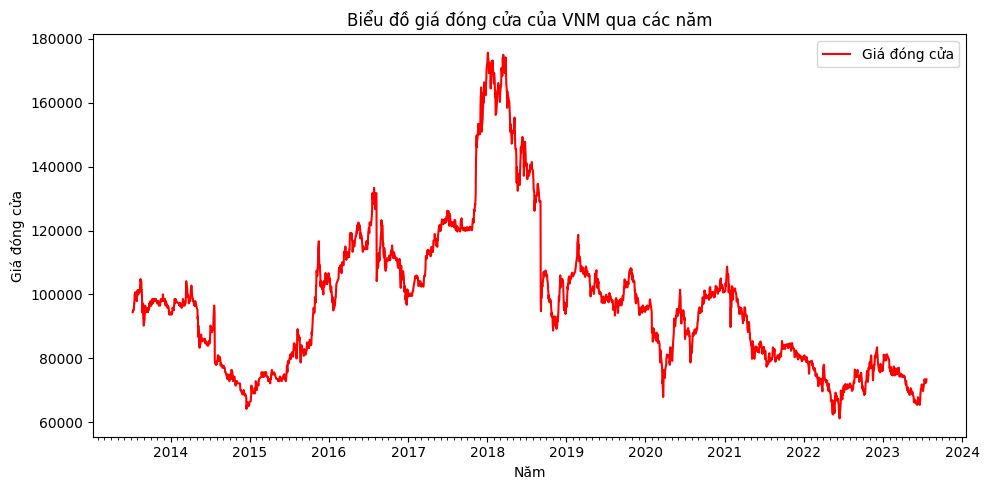

In [8]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator # Thêm MonthLocator vào để sửa lỗi

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()


In [9]:
def compute_RSI(series, period=14):
    delta = series.diff() # Tính toán sự thay đổi giữa các giá trị liên tiếp
    gain = delta.where(delta > 0, 0.0)#  giữ giá trị dương và thay thế giá trị âm bằng 0
    loss = -delta.where(delta < 0, 0.0)#  giữ giá trị âm và thay thế giá trị dương bằng 0

    avg_gain = gain.rolling(window=period).mean()#mảng chứa các giá trị trung bình gain trong thời gian period
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss # đoạn này lấy mảng chia mảng
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [10]:
def compute_MACD(series, slow=26, fast=12, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()

    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=signal, adjust=False).mean()

    return macd, signal_line

In [11]:
df['RSI'] = compute_RSI(df['Đóng cửa'])
df['MACD'], df['Signal'] = compute_MACD(df['Đóng cửa'])

In [12]:
df = df.dropna() ## xóa các dòng có giá trị NaN

In [13]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa','RSI', 'MACD', 'Signal'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa,RSI,MACD,Signal
Ngày,,,,
2013-07-29,97917.0,64.709869,1297.379483,1074.853940
2013-07-30,98611.0,66.669334,1233.859114,1106.654975
2013-07-31,100694.0,71.430531,1336.196613,1152.563302
2013-08-01,100694.0,70.000720,1401.148253,1202.280292
2013-08-02,101389.0,71.430531,1491.510384,1260.126311
...,...,...,...,...
2023-07-17,72300.0,60.227273,1298.104852,1067.904740
2023-07-18,72400.0,60.227273,1250.452056,1104.414204
2023-07-19,72600.0,54.545455,1214.821494,1126.495662


In [14]:
#chia tập dữ liệu
train_data = df1.iloc[:1500]
test_data = df1.iloc[1500:]

In [15]:
train_data

,Đóng cửa,RSI,MACD,Signal
Ngày,,,,
2013-07-29,97917.0,64.709869,1297.379483,1074.853940
2013-07-30,98611.0,66.669334,1233.859114,1106.654975
2013-07-31,100694.0,71.430531,1336.196613,1152.563302
2013-08-01,100694.0,70.000720,1401.148253,1202.280292
2013-08-02,101389.0,71.430531,1491.510384,1260.126311
...,...,...,...,...
2019-07-30,97787.0,43.361645,-275.824180,-229.302345
2019-07-31,97549.0,41.227293,-345.157060,-252.473288
2019-08-01,98341.0,50.890643,-332.364792,-268.451589


In [16]:
#chuẩn hóa dữ liệu
# sc = MinMaxScaler(feature_range=(0,1))
features = df[['Đóng cửa', 'RSI', 'MACD', 'Signal']]   # x
target = df[['Đóng cửa']]  
sc_x = MinMaxScaler()
x_scaled = sc_x.fit_transform(features)

sc_y = MinMaxScaler()
y_scaled = sc_y.fit_transform(target)

In [33]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(x_scaled[i-50:i]) #lấy 50 giá đóng cửa liên tục
  y_train.append(y_scaled[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [36]:
print(x_train[0].shape)

(50, 4)


In [19]:
y_train

[np.float64(0.3145780319617488),
 np.float64(0.3267283601255797),
 np.float64(0.3145780319617488),
 np.float64(0.3145780319617488),
 np.float64(0.32065756981190174),
 np.float64(0.3267283601255797),
 np.float64(0.3267283601255797),
 np.float64(0.32065756981190174),
 np.float64(0.3267283601255797),
 np.float64(0.3267283601255797),
 np.float64(0.32065756981190174),
 np.float64(0.32065756981190174),
 np.float64(0.3267283601255797),
 np.float64(0.3267283601255797),
 np.float64(0.32065756981190174),
 np.float64(0.32065756981190174),
 np.float64(0.32065756981190174),
 np.float64(0.3145780319617488),
 np.float64(0.3145780319617488),
 np.float64(0.3145780319617488),
 np.float64(0.32065756981190174),
 np.float64(0.32065756981190174),
 np.float64(0.3145780319617488),
 np.float64(0.30850724164807086),
 np.float64(0.30850724164807086),
 np.float64(0.30850724164807086),
 np.float64(0.30850724164807086),
 np.float64(0.30850724164807086),
 np.float64(0.32065756981190174),
 np.float64(0.32672836012557

In [ ]:
x_train = np.array(x_train) #chuyển dữ liêu tập x thành mảng 3 chiều
y_train = np.array(y_train) #chuyển dữ liêu tập y thành vector 2 chiều


In [21]:
print(x_train.shape)

(1450, 50, 4)


# Bước 5: Xây dựng và huấn luyện mô hình

In [22]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=((x_train.shape[1], x_train.shape[2])),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

e:\DL\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#huấn luyện mô hình
save_model = "E:/DL/save_model.h5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

In [24]:
#dữ liệu train
y_train = sc_y.inverse_transform(y_train.reshape(-1, 1))
y_train = sc_y.inverse_transform(y_train) #giá thực

final_model = load_model("E:/DL/save_model.h5") #tải mô hình đã huấn luyện
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc_y.inverse_transform(y_train_predict) #giá dự đoán

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step


# Bước 6: Tái sử dụng mô hình

In [25]:
# === 1. Lấy dữ liệu test (bao gồm cả 50 dòng trước đó để tạo chuỗi thời gian) ===
test_features = df[['Đóng cửa', 'RSI', 'MACD', 'Signal']].values
test_features = test_features[len(train_data) - 50:]  # lấy 50 dòng cuối train + toàn bộ test

# === 2. Chuẩn hóa bằng scaler đã fit trên dữ liệu train ===
sc_test = sc_x.transform(test_features)  # sc_x đã fit trên 4 cột

# === 3. Tạo x_test từ dữ liệu chuẩn hóa ===
x_test = []
for i in range(50, sc_test.shape[0]):
    x_test.append(sc_test[i-50:i])  # lấy 50 ngày liên tiếp (shape mỗi mẫu: 50x4)

x_test = np.array(x_test)  # shape: (số mẫu, 50, 4)

# === 4. Tạo y_test là giá đóng cửa thực tế (cột Đóng cửa) ===
y_test = df[['Đóng cửa']].values[len(train_data):]  # từ dòng 1500 trở đi
y_test = y_test.reshape(-1, 1)

# === 5. Dự đoán và đảo ngược scale về giá thật ===
y_test_predict = final_model.predict(x_test)
y_test_predict = sc_y.inverse_transform(y_test_predict)  # sc_y dùng cho cột 'Đóng cửa'


 6/31 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

e:\DL\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


# Độ chính xác của mô hình

C:\Users\User\AppData\Local\Temp\ipykernel_13464\4116970591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
C:\Users\User\AppData\Local\Temp\ipykernel_13464\4116970591.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


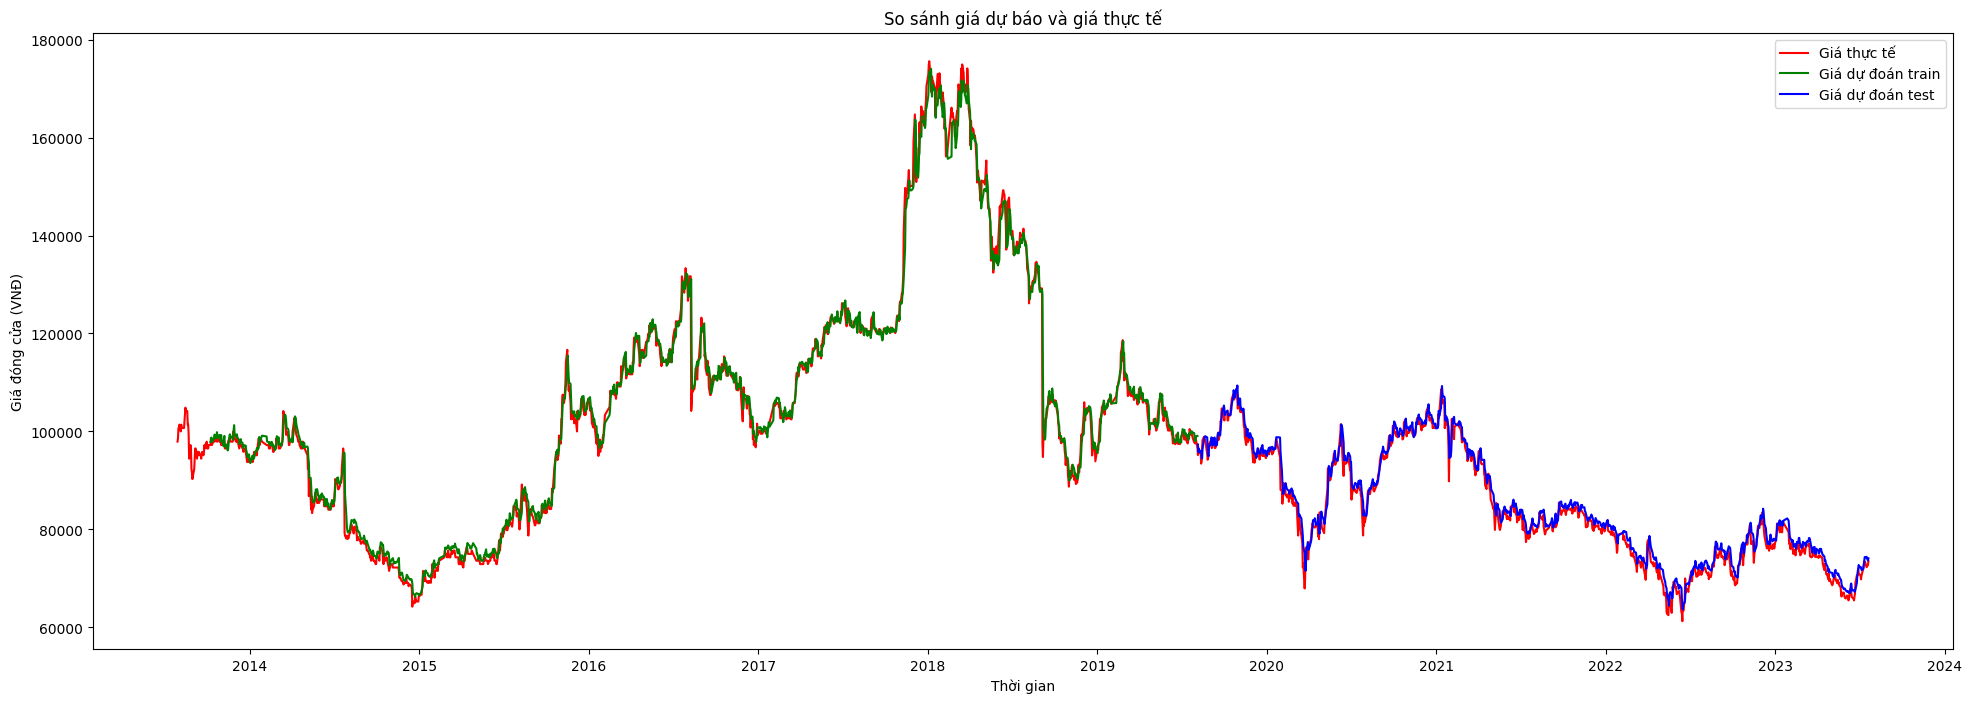

In [37]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1['Đóng cửa'],label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [27]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: -19.11301098590278
Sai số tuyệt đối trung bình trên tập train (VNĐ): 12153032381.378351
Phần trăm sai số tuyệt đối trung bình tập train: 0.9999912094270731


In [28]:
train_data1

,Đóng cửa,RSI,MACD,Signal,Dự đoán
Ngày,,,,,
2013-10-08,97222.0,64.290123,170.018984,-53.468493,97870.343750
2013-10-09,98611.0,66.669867,303.347245,17.894655,98082.742188
2013-10-10,97222.0,56.251688,293.546341,73.024992,98750.062500
2013-10-11,97222.0,60.000000,282.522313,114.924456,97886.265625
2013-10-14,97917.0,60.003840,326.107222,157.161009,98190.726562
...,...,...,...,...,...
2019-07-30,97787.0,43.361645,-275.824180,-229.302345,98381.031250
2019-07-31,97549.0,41.227293,-345.157060,-252.473288,98117.343750
2019-08-01,98341.0,50.890643,-332.364792,-268.451589,98036.632812


In [29]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9760998305600058
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1361.6510183026714
Phần trăm sai số tuyệt đối trung bình tập test: 0.016792636165056222


In [30]:
test_data1

,Đóng cửa,RSI,MACD,Signal,Dự đoán
Ngày,,,,,
2019-08-06,95174.0,28.692682,-656.616097,-383.606568,97347.242188
2019-08-07,95807.0,35.244799,-758.323428,-458.549940,95785.289062
2019-08-08,95728.0,20.002526,-835.668791,-533.973710,96499.210938
2019-08-09,95807.0,24.136430,-880.441724,-603.267313,95726.882812
2019-08-12,95491.0,23.337075,-930.694687,-668.752788,96067.906250
...,...,...,...,...,...
2023-07-17,72300.0,60.227273,1298.104852,1067.904740,74416.085938
2023-07-18,72400.0,60.227273,1250.452056,1104.414204,74036.031250
2023-07-19,72600.0,54.545455,1214.821494,1126.495662,73931.703125


# Thử dự đoán giá tương lai và so sánh với giá ngày cuối

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


e:\DL\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


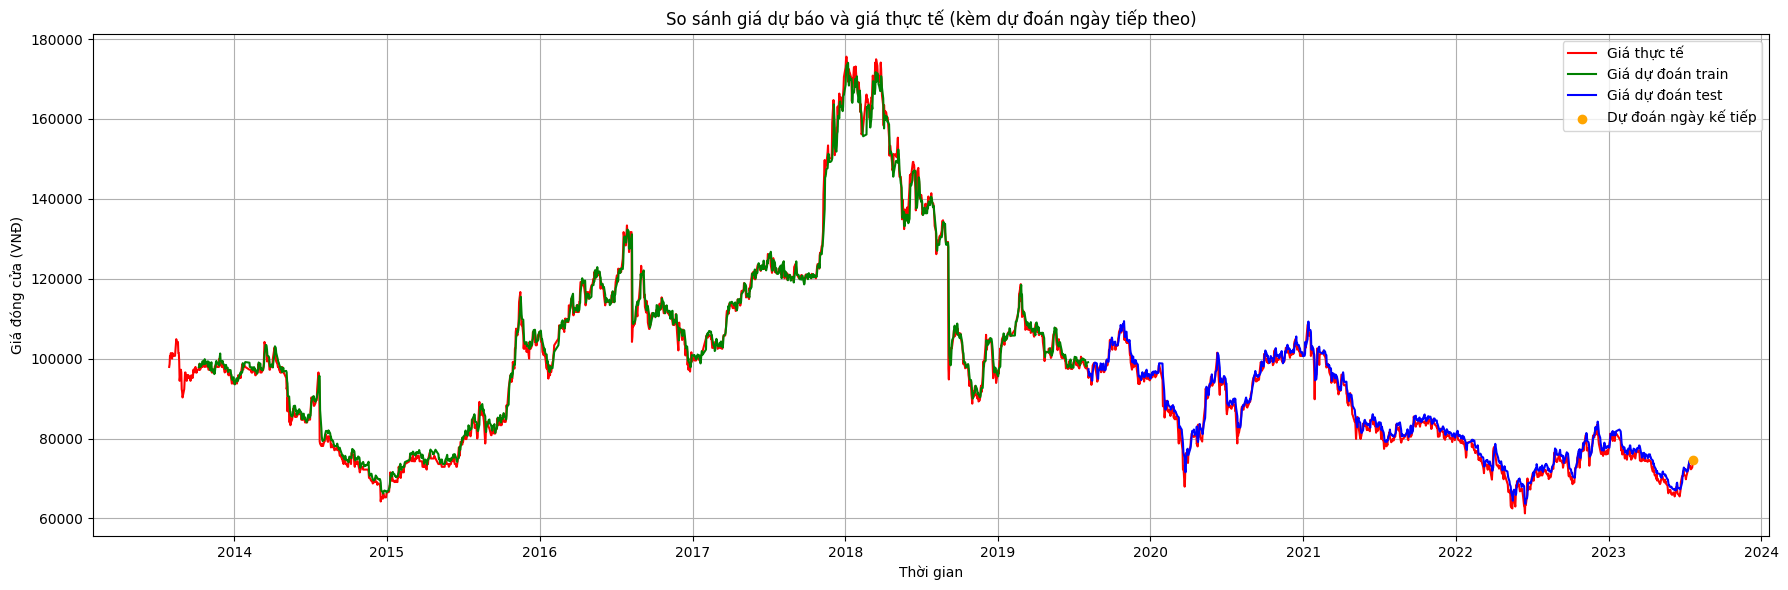

In [31]:
features = df[['Đóng cửa', 'RSI', 'MACD', 'Signal']]
# 1. Lấy 50 giá đóng cửa gần nhất để dự đoán ngày kế tiếp
last_50 = features.values[-50:]  # Lấy 50 giá cuối
x_next = sc_x.transform(last_50)         # Chuẩn hóa theo scaler của X
x_next = np.reshape(x_next, (1, x_next.shape[0], x_next.shape[1]))  # (1, 50, num_features)

# 2. Dự đoán giá ngày tiếp theo
y_next_predict = final_model.predict(x_next)
y_next_predict = sc_y.inverse_transform(y_next_predict)[0][0]  # Giá trị thực

# 3. Ngày tiếp theo sau ngày cuối cùng
next_date = pd.to_datetime(df1.index[-1]) + pd.Timedelta(days=1)

# 4. Thêm vào DataFrame gốc để vẽ
df1_extended = df1.copy()
next_price = float(y_next_predict)

# Tạo DataFrame chứa dòng mới
new_row = pd.DataFrame({
    'Đóng cửa': [np.nan],       # hoặc giá thực nếu bạn có
    'Dự đoán': [next_price]
}, index=[next_date])           # thêm ngày vào làm chỉ số dòng

# Gộp vào DataFrame cũ
df1_extended = pd.concat([df1_extended, new_row])

# 5. Vẽ biểu đồ
plt.figure(figsize=(18, 6))
plt.plot(df1.index, df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict], color='orange', label='Dự đoán ngày kế tiếp', zorder=5)

plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế (kèm dự đoán ngày tiếp theo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Xử lý giá trị dự đoán: ép kiểu nếu cần
predicted_price = float(y_next_predict)  # nếu là scalar
# Hoặc:
# predicted_price = y_next_predict[0]       # nếu là mảng 1D
# predicted_price = y_next_predict[0][0]    # nếu là mảng 2D

# Tạo DataFrame so sánh
comparison_df = pd.DataFrame({
    'Ngày': [next_date],
    'Giá dự đoán': [predicted_price],
    'Giá ngày trước': [actual_closing_price]
})

# In ra bảng so sánh
print(comparison_df)


        Ngày   Giá dự đoán  Giá ngày trước
0 2023-07-22  74710.492188         73500.0
